0. Open
1. Review
2. Topic

    2.1 텍스트 분류
    
    2.2 태깅 작업
    
3. Q & A
4. Next
5. Close

## 텍스트 분류

- 텍스트 분류(Text Classification) : 텍스트를 입력으로 받아, 텍스트가 어떤 종류의 범주(class)에 속하는지 구분하는 작업

- 텍스트 분류에서 범주의 형태
    - 이진 분류)binary classification)
    - 다중 클래스 분류(multi-class classification)
    
- 텍스트 분류 예시
    - 스팸 메일 분류
    - 감성 분석
    - 뉴스 분류
    - 의도 분석
   

- 텍스트 분류 절차
    0. 문제 정의
    1. 데이터 수집
    2. 데이터 이해
    3. 데이터 전처리
    4. 훈련 데이터와 테스트 데이터 분리
    5. 훈련
    6. 정확도 측정

- 텍스트 분류는 RNN의 다대일(many-to-one) 문제
- 이진분류 : 활성화 함수 -> 시그모이드, 손실 함수 -> binary_crossentropy
- 다중 클래스 분류 : 활성화 함수 -> 소프트맥스, 손실 함수 -> categorical_crossentropy

## 나이브 베이즈 분류기(Naive Bayes Classifier)

- 나이브 베이즈 분류기는 머신 러닝 알고리즘
- 베이즈의 정리(Bayes' theorem) : 조건부 확률을 계산하는 방법

#### 베이즈의 정리(Bayes' Theorem)

- P(A) : A가 일어날 확률
- P(B) : B가 일어날 확률
- P(B|A) : A가 일어나고나서 B가 일어날 확률
- P(A|B) : B가 일어나고나서 A가 일어날 확률

- P(B|A)를 쉽게 구할 수 있는 상황이라면 다음과 같은 식으로 P(A|B)를 구할 수 있다.

P(A|B) = P(B|A)P(A) / P(B)

- 나이브 베이즈 분류기는 베이즈의 정리를 이용하여 텍스트 분류를 수행한다.

#### 나이브 베이즈 분류기를 이용한 스팸 메일 필터 생성에 대한 이해

- 입력 텍스트(메일 본문)이 주어졌을 때, 입력 텍스트가 정상 메일인지 스팸 메일인지 구분하기 위한 확률

P(정상메일|입력 텍스트) = 입력 텍스트가 있을 때 정상 메일일 확률
P(스팸메일|입력 텍스트) = 입력 텍스트가 있을 때 스팸 메일일 확률

- 베이즈의 정리로 표현

P(정상메일|입력 텍스트) = P(입력 텍스트|정상 메일) X P(정상 메일) / P(메일 텍스트)
P(스팸메일|입력 텍스트) = P(입력 텍스트|스팸 메일) X P(스팸 메일) / P(메일 텍스트)

- 간소화된 표현

P(정상메일|입력 텍스트) = P(입력 텍스트|정상 메일) X P(정상 메일)
P(스팸메일|입력 텍스트) = P(입력 텍스트|스팸 메일) X P(스팸 메일)

## SciKit Learn에 있는 20Newsgroups 뉴스 데이터 분류

#### 데이터 이해

In [1]:
from sklearn.datasets import fetch_20newsgroups

In [5]:
news_data = fetch_20newsgroups(subset='train')
print(news_data.keys())

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])


In [6]:
print(len(news_data), len(newsdata.filenames), len(newsdata.target_names), len(newsdata.target))

5 11314 20 11314


In [7]:
print(news_data.target_names)

['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


#### 나이브 베이즈 분류

In [9]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

In [11]:
dtmvector = CountVectorizer()
X_train_dtm = dtmvector.fit_transform(news_data.data)
print(X_train_dtm.shape)

(11314, 130107)


In [14]:
# TF-IDF 행렬 구성
tfidf_transformer = TfidfTransformer()
tfidfv = tfidf_transformer.fit_transform(X_train_dtm)
print(tfidfv.shape)

(11314, 130107)


In [15]:
# 나이브 베이즈 분류
mod = MultinomialNB()
mod.fit(tfidfv, news_data.target)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [16]:
newsdata_test = fetch_20newsgroups(subset='test', shuffle=True)
X_test_dtm = dtmvector.transform(newsdata_test.data)
tfidfv_test = tfidf_transformer.transform(X_test_dtm)

In [18]:
predicted = mod.predict(tfidfv_test)
print("정확도 : {}".format(accuracy_score(newsdata_test.target, predicted)))

정확도 : 0.7738980350504514


## 태깅 작업(Tagging Task)

- 각 단어가 어떤 유형에 속해 있는지를 알아내는 작업
- 태깅 작업 종류
    1. 개채명 인식(Named Entity Recognition) : 각 단어의 유형이 사람, 장소, 단체를 어떤 유형인지 알아내는 작업
    2. 품사 태깅(Part-of-Speech Tagging) : 각 단어의 품사가 명사, 동사, 형용사 인지를 알아내는 작업
- 태깅 작업은 챗봇, 기계 번역 등과 같은 자연어 처리 분야에서 전처리 작업으로 필요한 경우가 많다.
- RNN의 다대다(many-to-many) 형태로 작업하며, 앞/뒤 시점의 입력을 모두 참조하는 양방향 RNN(Bidirection RNN)을 사용

### NLTK 제공 개체명 인식

In [19]:
from nltk import word_tokenize, pos_tag, ne_chunk

In [20]:
sentence = "James is working at Disney is London"
sentence = pos_tag(word_tokenize(sentence))
print(sentence)

[('James', 'NNP'), ('is', 'VBZ'), ('working', 'VBG'), ('at', 'IN'), ('Disney', 'NNP'), ('is', 'VBZ'), ('London', 'NNP')]


In [25]:
sentence = ne_chunk(sentence)
print(sentence)

(S
  (PERSON James/NNP)
  is/VBZ
  working/VBG
  at/IN
  (ORGANIZATION Disney/NNP)
  is/VBZ
  (GPE London/NNP))


### 양방향 LSTM을 이용한 개체명 인식

#### BIO 표현
- B : Begin, 개체명 시작 부분
- I : Inside, 개체명 내부 부분
- O : Outside, 개체명이 아닌 부분

- "해리포터보러가자"는 단어 시퀀스에 대한 개체명 인식

해 - B  
리 - I  
포 - I  
터 - I  
보 - O  
러 - O  
가 - O  
자 - O  

In [27]:
%matplotlib inline

import re
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

#### 데이터 이해 및 전처리

In [32]:
f = open('train.txt', 'r')
tagged_sequences = []
sentences = []

for line in f:
    if len(line) == 0 or line.startswith('-DOCSTART') or line[0] == '\n':
        if len(sentence) > 0:
            tagged_sequences.append(sentence)
            sentence = []
        continue
    splits = line.split(' ')
    splits [-1] = re.sub(r'\n', '', splits[-1])
    word = splits[0].lower()
    sentence.append([word, splits[-1]])

In [33]:
print('전체 샘플 개수 : {}'.format(len(tagged_sequences)))

전체 샘플 개수 : 14041


In [34]:
print(tagged_sequences[0])

[['eu', 'B-ORG'], ['rejects', 'O'], ['german', 'B-MISC'], ['call', 'O'], ['to', 'O'], ['boycott', 'O'], ['british', 'B-MISC'], ['lamb', 'O'], ['.', 'O']]


In [35]:
sentences, ner_tags = [], []

for tagged_sequence in tagged_sequences:
    sentence, tag_info = zip(*tagged_sequence)
    sentences.append(list(sentence))
    ner_tags.append(list(tag_info))

In [36]:
print(sentences[0])
print(ner_tags[0])

['eu', 'rejects', 'german', 'call', 'to', 'boycott', 'british', 'lamb', '.']
['B-ORG', 'O', 'B-MISC', 'O', 'O', 'O', 'B-MISC', 'O', 'O']


In [37]:
print(sentences[12])
print(ner_tags[12])

['only', 'france', 'and', 'britain', 'backed', 'fischler', "'s", 'proposal', '.']
['O', 'B-LOC', 'O', 'B-LOC', 'O', 'B-PER', 'O', 'O', 'O']


샘플의 최대 길이 : 113
샘플의 평균 길이 : 14.501887329962253


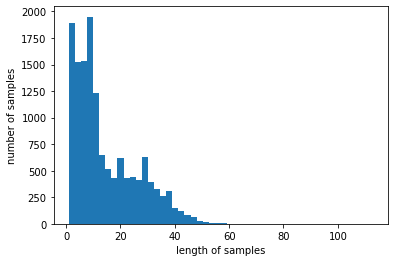

In [38]:
print('샘플의 최대 길이 : {}'.format(max(len(l) for l in sentences)))
print('샘플의 평균 길이 : {}'.format(sum(map(len, sentences ))/len(sentences)))
plt.hist([len(s) for s in sentences], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

#### Token화 및 훈련/테스트

In [39]:
max_words = 4000
src_tokenizer = Tokenizer(num_words=max_words, oov_token='OOV')
src_tokenizer.fit_on_texts(sentences)

tar_tokenizer = Tokenizer()
tar_tokenizer.fit_on_texts(ner_tags)

In [41]:
vocab_size = max_words
tag_size = len(tar_tokenizer.word_index) + 1
print('단어 집합의 크기 : {}'.format(vocab_size))
print('개체명 태깅 정보 집합의 크기 : {}'.format(tag_size))

단어 집합의 크기 : 4000
개체명 태깅 정보 집합의 크기 : 10


In [43]:
X_train = src_tokenizer.texts_to_sequences(sentences)
y_train = tar_tokenizer.texts_to_sequences(ner_tags)

In [44]:
print(X_train[0])
print(y_train[0])

[989, 1, 205, 629, 7, 3939, 216, 1, 3]
[4, 1, 7, 1, 1, 1, 7, 1, 1]


In [45]:
index_to_word = src_tokenizer.index_word
index_to_ner = tar_tokenizer.index_word

In [46]:
decoded = []

for index in X_train[0]:
    decoded.append(index_to_word[index])
    
print('기존 문장 : {}'.format(sentences[0]))
print('빈도수가 낮은 단어가 OOV 처리된 문장 : {}'.format(decoded))

기존 문장 : ['eu', 'rejects', 'german', 'call', 'to', 'boycott', 'british', 'lamb', '.']
빈도수가 낮은 단어가 OOV 처리된 문장 : ['eu', 'OOV', 'german', 'call', 'to', 'boycott', 'british', 'OOV', '.']


#### 훈련/테스트 데이터 분리

In [47]:
max_len = 70
X_train = pad_sequences(X_train, padding='post', maxlen=max_len)
y_train = pad_sequences(y_train, padding='post', maxlen=max_len)

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=.2, random_state=777)

In [49]:
y_train = to_categorical(y_train, num_classes=tag_size)
y_test = to_categorical(y_test, num_classes=tag_size)

In [50]:
print('훈련 샘플 문장의 크기 : {}'.format(X_train.shape))
print('훈련 샘플 레이블의 크기 : {}'.format(y_train.shape))
print('테스트 샘플 문장의 크기 : {}'.format(X_test.shape))
print('테스트 샘플 레이블의 크기 : {}'.format(y_test.shape))

훈련 샘플 문장의 크기 : (11232, 70)
훈련 샘플 레이블의 크기 : (11232, 70, 10)
테스트 샘플 문장의 크기 : (2809, 70)
테스트 샘플 레이블의 크기 : (2809, 70, 10)


### 양방향 LSTM(Bi-directional LSTM)이용 개체명 인식기 모델

In [52]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, Bidirectional, TimeDistributed
from tensorflow.keras.optimizers import Adam

In [53]:
model = Sequential()

model.add(Embedding(input_dim=vocab_size, output_dim=120, input_length=max_len, mask_zero=True))
model.add(Bidirectional(LSTM(256, return_sequences=True)))
model.add(TimeDistributed(Dense(tag_size, activation='softmax')))

In [54]:
model.compile(loss='categorical_crossentropy', optimizer=Adam(0.001), metrics=['accuracy'])
model.fit(X_train, y_train, batch_size=128, epochs=8, validation_data=(X_test, y_test))

Train on 11232 samples, validate on 2809 samples
Epoch 1/8
11232/11232 [==============================] - 137s 12ms/sample - loss: 0.1898 - accuracy: 0.8243 - val_loss: 0.1347 - val_accuracy: 0.8315
Epoch 2/8
11232/11232 [==============================] - 139s 12ms/sample - loss: 0.1046 - accuracy: 0.8496 - val_loss: 0.0812 - val_accuracy: 0.8827
Epoch 3/8
11232/11232 [==============================] - 139s 12ms/sample - loss: 0.0712 - accuracy: 0.8969 - val_loss: 0.0590 - val_accuracy: 0.9145
Epoch 4/8
11232/11232 [==============================] - 138s 12ms/sample - loss: 0.0519 - accuracy: 0.9263 - val_loss: 0.0454 - val_accuracy: 0.9350
Epoch 5/8
11232/11232 [==============================] - 139s 12ms/sample - loss: 0.0394 - accuracy: 0.9445 - val_loss: 0.0381 - val_accuracy: 0.9467
Epoch 6/8
11232/11232 [==============================] - 139s 12ms/sample - loss: 0.0330 - accuracy: 0.9527 - val_loss: 0.0355 - val_accuracy: 0.9517
Epoch 7/8
11232/11232 [============================

In [55]:
print('테스트 정확도 : %.4f' %(model.evaluate(X_test, y_test)[1]))

2809/2809 [==============================] - 13s 5ms/sample - loss: 0.0324 - accuracy: 0.9559
테스트 정확도 : 0.9559


In [60]:
i = 10
y_predicted = model.predict(np.array([X_test[i]]))
y_predicted = np.argmax(y_predicted, axis=-1)
true = np.argmax(y_test[i], -1)

print('{:15}|{:5}|{}'.format("단어", "실제값", "예측값"))
print(35*"-")
for w, t, pred in zip(X_test[i], true, y_predicted[0]):
    if w != 0:
        print("{:17}: {:7} {}".format(index_to_word[w], index_to_ner[t].upper(), index_to_ner[pred].upper()))

단어             |실제값  |예측값
-----------------------------------
sarah            : B-PER   B-PER
brady            : I-PER   I-PER
,                : O       O
whose            : O       O
republican       : B-MISC  B-MISC
husband          : O       O
was              : O       O
OOV              : O       O
OOV              : O       O
in               : O       O
an               : O       O
OOV              : O       O
attempt          : O       O
on               : O       O
president        : O       O
ronald           : B-PER   B-PER
reagan           : I-PER   I-PER
,                : O       O
took             : O       O
centre           : O       O
stage            : O       O
at               : O       O
the              : O       O
democratic       : B-MISC  B-MISC
national         : I-MISC  I-MISC
convention       : I-MISC  I-MISC
on               : O       O
monday           : O       O
night            : O       O
to               : O       O
OOV              : O       O
pre